<a href="https://colab.research.google.com/github/Favour-Data-Analyst/Favour-Data-Analyst/blob/main/PIP_GROUP_II_MAIN_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

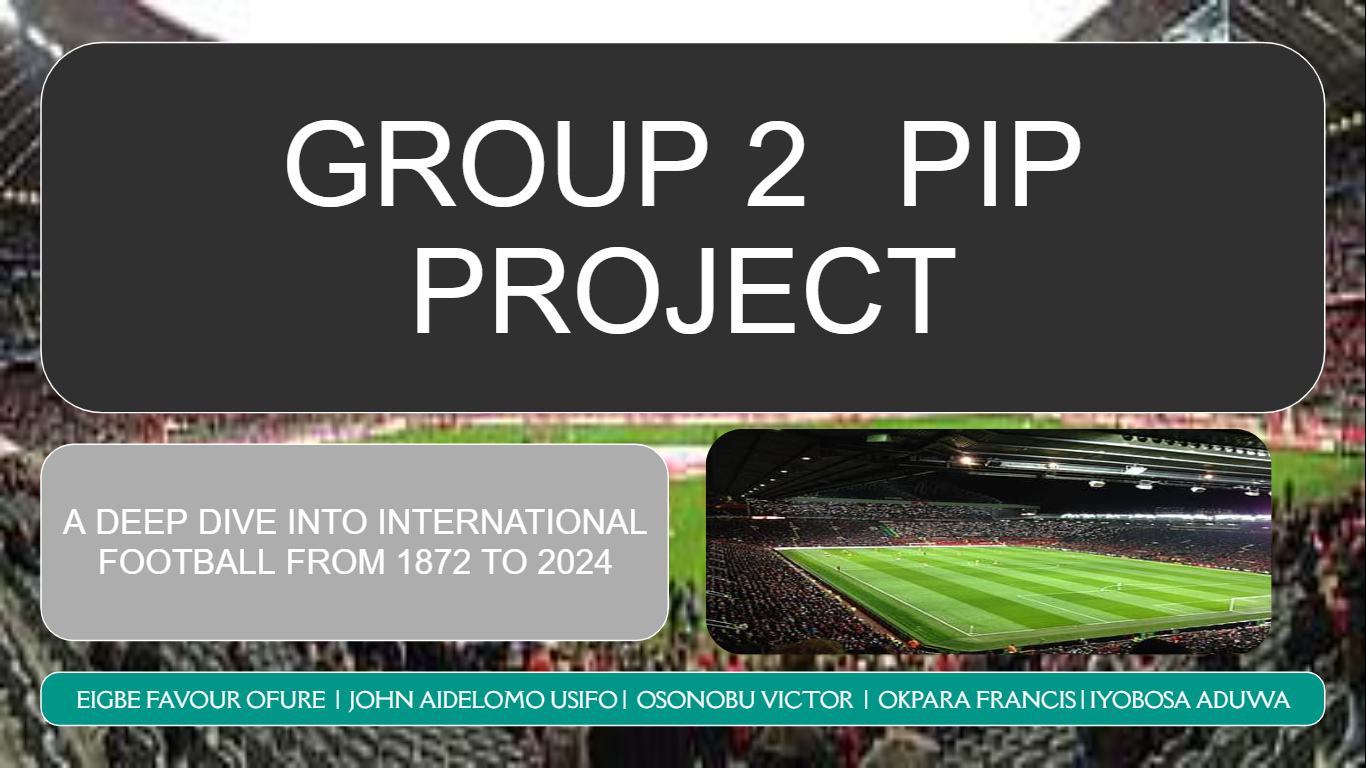

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**EXPLORATORY DATA ANALYSIS ON INTERNATIONAL FOOTBALL DATASET**

An excel workbook was provided to us by our facilitator, Mr. Shedrach of PIP community containing three worksheets 'results', 'shootouts', 'goalscorers'.
This dataset includes 47,917 results of international football matches starting from the very first
official match in 1872 up to 2024. The matches range from FIFA World Cup to FIFI Wild Cup to
regular friendly matches. The matches are strictly men's full internationals and the data does not
include Olympic Games or matches where at least one of the teams was the nation's B-team, U-23
or a league select team.


In [ ]:
# @title
#Importing the neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# @title
#load the datasets
#this is an excel workbook containing three sheets of data
df = pd.ExcelFile('/content/drive/MyDrive/FILES/PIP PROJECT1.5.xlsx')
df.sheet_names


['shootouts', 'results', 'goalscorers']

In [ ]:
# @title
#Assigning the different sheets to a dictionary so we can work on different sheets without calling the workbook
results_df = df.parse('results')
shootouts_df = df.parse('shootouts')
goalscorers_df = df.parse('goalscorers')


In [ ]:
# @title
#calling the results sheet
results_df

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False
...,...,...,...,...,...,...,...,...,...
47912,2024-11-19,Oman,Iraq,0,1,FIFA World Cup qualification,Muscat,Oman,False
47913,2024-11-19,Kuwait,Jordan,1,1,FIFA World Cup qualification,Kuwait City,Kuwait,False
47914,2024-11-19,Bahrain,Australia,2,2,FIFA World Cup qualification,Riffa,Bahrain,False
47915,2024-11-19,Indonesia,Saudi Arabia,2,0,FIFA World Cup qualification,Jakarta,Indonesia,False


In [ ]:
# @title
#calling the goalscorer sheet
goalscorers_df

,date,home_team,away_team,team,scorer,minute,own_goal,penalty
0,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,44.0,False,False
1,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,55.0,False,False
2,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,70.0,False,False
3,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,75.0,False,False
4,1916-07-06,Argentina,Chile,Argentina,Alberto Ohaco,2.0,False,False
...,...,...,...,...,...,...,...,...
44357,2024-07-13,Canada,Uruguay,Uruguay,Luis Suárez,90.0,False,False
44358,2024-07-14,Argentina,Colombia,Argentina,Lautaro Martínez,112.0,False,False
44359,2024-07-14,Spain,England,Spain,Nico Williams,47.0,False,False
44360,2024-07-14,Spain,England,England,Cole Palmer,73.0,False,False


In [ ]:
# @title
#calling the shootout sheet
shootouts_df

,date,home_team,away_team,winner,first_shooter
0,1967-08-22,India,Taiwan,Taiwan,NaN
1,1971-11-14,South Korea,Vietnam Republic,South Korea,NaN
2,1972-05-07,South Korea,Iraq,Iraq,NaN
3,1972-05-17,Thailand,South Korea,South Korea,NaN
4,1972-05-19,Thailand,Cambodia,Thailand,NaN
...,...,...,...,...,...
640,2024-07-05,Venezuela,Canada,Canada,Venezuela
641,2024-07-06,England,Switzerland,England,England
642,2024-07-06,Uruguay,Brazil,Uruguay,Uruguay
643,2024-07-13,Canada,Uruguay,Uruguay,Canada


Changing the data types of the data columns of the different sheets

In [ ]:
# @title
#changing the data type of the data column
results_df['date'] = pd.to_datetime(results_df['date'])
goalscorers_df['date'] = pd.to_datetime(goalscorers_df['date'])
shootouts_df['date'] = pd.to_datetime(shootouts_df['date'])
results_df.dtypes


,0
date,datetime64[ns]
home_team,object
away_team,object
home_score,int64
away_score,int64
tournament,object
city,object
country,object
neutral,bool


In [ ]:
# @title
#Creates a column to calculate the outcome of each game.
results_df['Outcome'] = results_df.apply(
    lambda row: row['home_team'] if row['home_score'] > row['away_score'] else
    (row['away_team'] if row['away_score'] > row['home_score'] else 'Draw'), axis=1
)
team_wins = results_df['Outcome'].value_counts()
results_df.head(5)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,Outcome
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,Draw
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,England
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,Scotland
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,Draw
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,Scotland


WHO IS THE BEST TEAM OF ALL TIME?

In [ ]:
# @title
#Best team of all time by games unbeaten(wins and draws)
wins = results_df[results_df['Outcome'] != 'Draw']['Outcome'].value_counts()

# Count draws for each team
home_draws = results_df[results_df['Outcome'] == 'Draw']['home_team'].value_counts()
away_draws = results_df[results_df['Outcome'] == 'Draw']['away_team'].value_counts()

# Total draws for each team
draws = home_draws.add(away_draws, fill_value=0)

# Combine wins and draws to calculate unbeaten statistic
unbeaten_count = wins.add(draws, fill_value=0)

#total number of games played
home_games = results_df['home_team'].value_counts()
away_games = results_df['away_team'].value_counts()
total_games = home_games.add(away_games, fill_value=0)

unbeaten_count = unbeaten_count.groupby(unbeaten_count.index).sum()
unbeaten_count = pd.DataFrame({'Games': total_games, 'Unbeaten': unbeaten_count})

# Display the top 10 teams based on unbeaten count
unbeaten_count = unbeaten_count.sort_values(by=['Unbeaten'],ascending=False)
unbeaten_count = unbeaten_count.head(10)
unbeaten_count

,Games,Unbeaten
Brazil,1046.0,879.0
England,1076.0,871.0
Argentina,1053.0,835.0
Germany,1014.0,800.0
South Korea,996.0,781.0
Sweden,1081.0,765.0
Mexico,980.0,725.0
Italy,870.0,704.0
Hungary,991.0,684.0
France,914.0,657.0


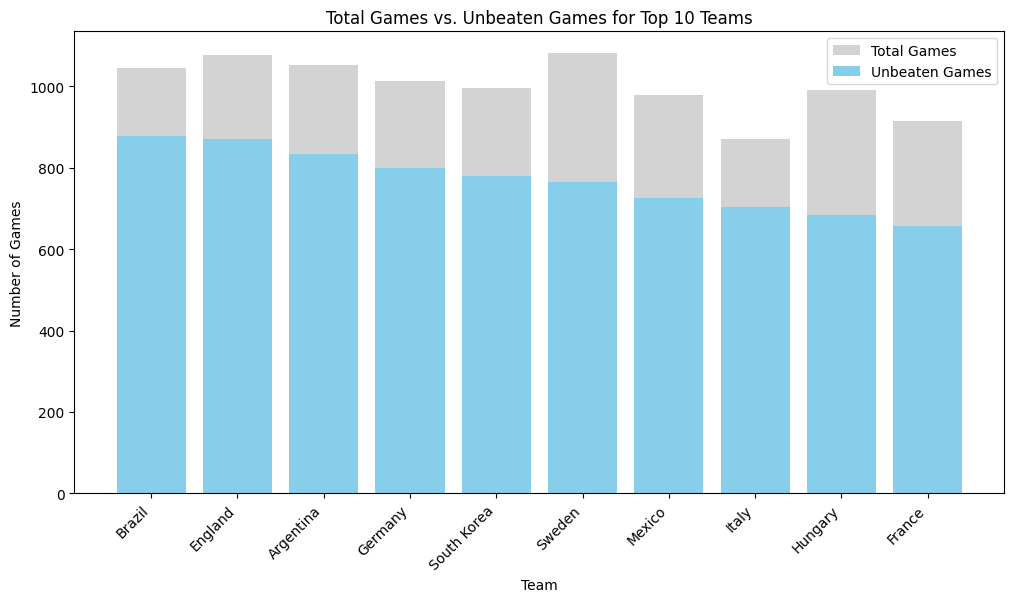

In [ ]:
# @title
# stacked column chart displaying the best teams of all time
fig, ax = plt.subplots(figsize=(12, 6))

ax.bar(unbeaten_count.index, unbeaten_count['Games'], label='Total Games', color='lightgray')
ax.bar(unbeaten_count.index, unbeaten_count['Unbeaten'], label='Unbeaten Games', color='skyblue')
ax.set_xlabel('Team')
ax.set_ylabel('Number of Games')
ax.set_title('Total Games vs. Unbeaten Games for Top 10 Teams')
ax.legend()
plt.xticks(rotation=45, ha='right')
plt.show()

The best team of all time is Brazil. We used results_df dataset to arrived at this conclusion, we derived this insight by calculating how many games they won and drew(UNBEATEN) from the total number of games played, and we can factually say the best team of all time is BRAZIL.

WHICH TEAM DOMINATED DIFFERENT ERAS OF FOOTBALL?
(DECADES)

In [ ]:
# @title
#created a year and decade columns to aid subsequent analysis
results_df['year'] = results_df['date'].dt.year
results_df['decade'] = (results_df['year'] // 10) * 10

In [ ]:
# @title
#The best team of each decade
best_teams = results_df[results_df['Outcome'] != 'Draw']\
                    .groupby('decade')['Outcome'].apply(lambda x: x.value_counts().idxmax())

best_teams




,Outcome
decade,
1870,Scotland
1880,Scotland
1890,England
1900,England
1910,Argentina
1920,Sweden
1930,Germany
1940,Argentina
1950,Brazil


WHAT TRENDS HAVE THERE BEEN IN INTERNATIONAL FOOTBALL? HOME ADVANTANGE, AWAY FORM, TOTAL GOALS SCORED, DISTRIBUTION OF TEAMS STRENGHTS ETC.

HOME ADVATANGE/STRENGHT


In [ ]:
# @title
# Teams with the best wins rate playing at home
home_wins = results_df[results_df['Outcome'] != 'Draw'].groupby('home_team')['Outcome'].apply(lambda x: (x == x.name).mean()).reset_index()
home_wins.columns = ['Team', 'Home Win Percentage']
home_wins['Home Win Percentage'] = home_wins['Home Win Percentage'] * 100
home_wins = home_wins.sort_values(by='Home Win Percentage', ascending=False)
#top 20 best home performing team
home_wins.head(20)




,Team,Home Win Percentage
175,Matabeleland,100.000000
311,Western Australia,100.000000
161,Luhansk PR,100.000000
152,Kárpátalja,100.000000
125,Hmong,100.000000
217,Parishes of Jersey,100.000000
99,Franconia,100.000000
317,Yorkshire,100.000000
85,Elba Island,100.000000
79,Donetsk PR,100.000000


AWAY STRENGHT OF TEAMS

In [ ]:
# @title
# Teams with the best wins rate playing at home
away_wins = results_df[results_df['Outcome'] != 'Draw'].groupby('away_team')['Outcome'].apply(lambda x: (x == x.name).mean()).reset_index()
away_wins.columns = ['Team', 'Away Win Percentage']
away_wins['Away Win Percentage'] = away_wins['Away Win Percentage'] * 100
away_wins = away_wins.sort_values(by='Away Win Percentage', ascending=False)
#top 20 best Away performing team
away_wins.head(20)




,Team,Away Win Percentage
267,Surrey,100.000000
175,Maule Sur,100.000000
34,Biafra,100.000000
245,Sealand,100.000000
17,Asturias,100.000000
67,Corsica,100.000000
148,Kernow,100.000000
7,Andalusia,100.000000
27,Basque Country,80.000000
69,County of Nice,80.000000


GOALS SCORED BY DECADE

In [ ]:
# @title
#total goals scored by decade
total_goals = results_df['home_score'] + results_df['away_score']
total_goalsScored = total_goals.groupby(results_df['date'].dt.year // 10 * 10).sum()
total_goalsScored = total_goalsScored.reset_index()
total_goalsScored.columns = ['Decade', 'Total Goals']
total_goalsScored

,Decade,Total Goals
0,1870,59
1,1880,307
2,1890,304
3,1900,548
4,1910,1231
5,1920,3159
6,1930,4676
7,1940,3612
8,1950,6600
9,1960,10412


NUMBER OF MATCHES PLAYED OVER TIME(DECADE)


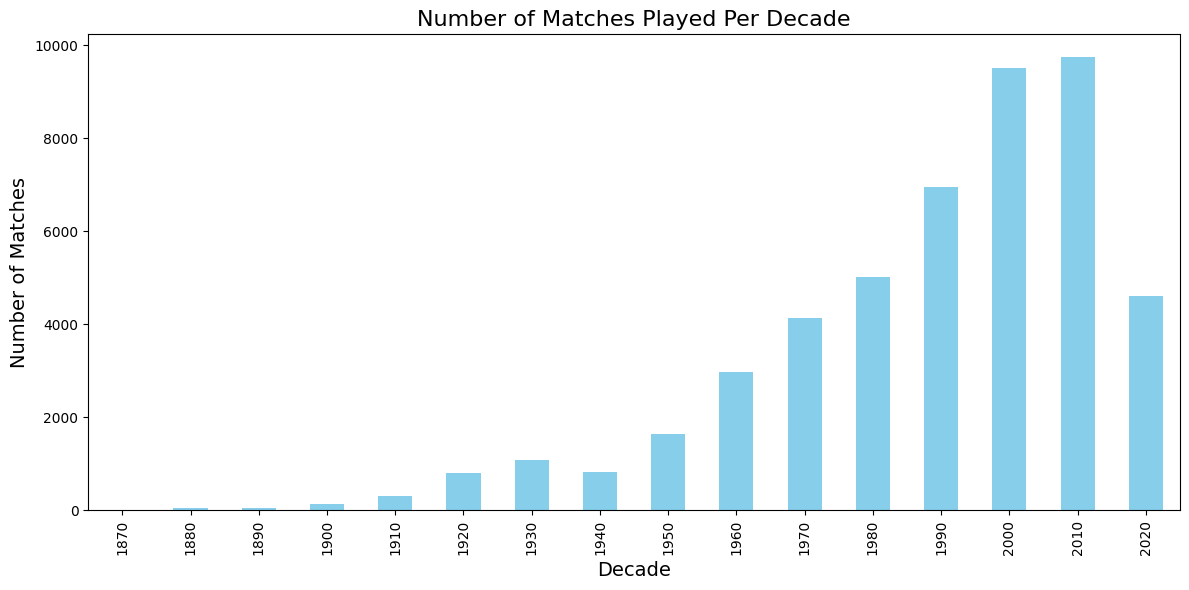

In [ ]:
# @title
#graph of matches played over time
matches_per_year = results_df.groupby('decade').size()
plt.figure(figsize=(12, 6))
matches_per_year.plot(kind='bar', color='skyblue')
plt.title('Number of Matches Played Per Decade', fontsize=16)
plt.xlabel('Decade', fontsize=14)
plt.ylabel('Number of Matches', fontsize=14)
plt.tight_layout()
plt.show()

As shown in the chart above, the number of games played per decade increased relative to the previous decade with the exception being the 1940s. This is because in that decade the world war II was raging, and while players signed up to fight, the football body did not have the finances to host any tournament for the available players for lack of funding as it all went to the war effort.
The same goes for the goals scored over time with the dip in goals in the 1940s period, which is displayed in the chart below.


<Figure size 1200x600 with 0 Axes>

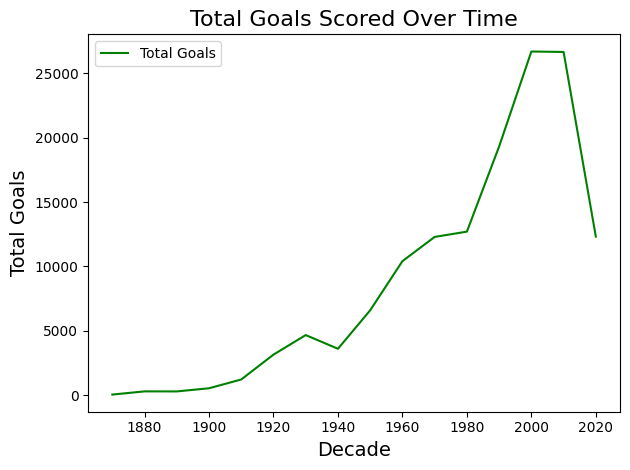

In [ ]:
# @title
#line chart of goals scored over time
plt.figure(figsize=(12, 6))
total_goalsScored.plot(x='Decade', y='Total Goals', kind='line', color='green')
plt.title('Total Goals Scored Over Time', fontsize=16)
plt.xlabel('Decade', fontsize=14)
plt.ylabel('Total Goals', fontsize=14)
plt.tight_layout()
plt.show()

MOST PARTICIPATED TOURNAMENTS

In [ ]:
# @title
#most played tournament / tornaments with the most participation
tournament_count = results_df['tournament'].value_counts()
tournament_count = tournament_count.reset_index()
tournament_count.columns = ['Tournament', 'Number of Matches']
#Top 10 most participated tournament of all time
tournament_count.head(10)

,Tournament,Number of Matches
0,Friendly,18040
1,FIFA World Cup qualification,8268
2,UEFA Euro qualification,2824
3,African Cup of Nations qualification,2218
4,FIFA World Cup,964
5,Copa América,873
6,African Cup of Nations,793
7,AFC Asian Cup qualification,770
8,UEFA Nations League,630
9,CECAFA Cup,620


<Figure size 1200x600 with 0 Axes>

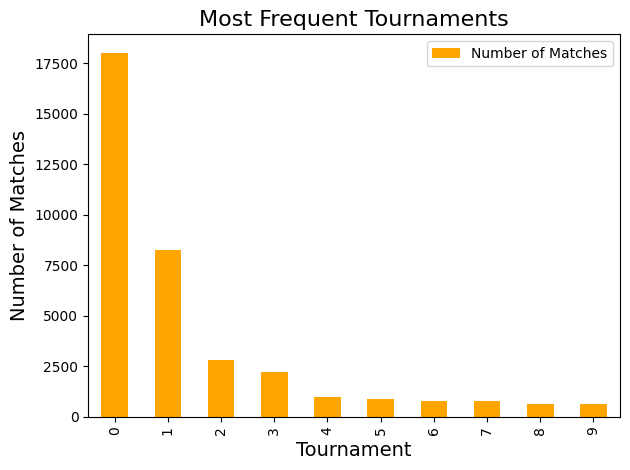

In [ ]:
# @title
plt.figure(figsize=(12, 6))
tournament_count.head(10).plot(kind='bar', color='orange')
plt.title('Most Frequent Tournaments', fontsize=16)
plt.xlabel('Tournament', fontsize=14)
plt.ylabel('Number of Matches', fontsize=14)
plt.tight_layout()
plt.show()

WHICH COUNTRIES HOSTED THE MOST FRIENDLIES AND FRIENDLY TOURNAMENTS?

In [ ]:
# @title
# top 10 neutral venue matches
neutral_matches = results_df[results_df['neutral'] == True].groupby('country').size()
neutral_matches = neutral_matches.sort_values(ascending=False)
neutral_matches = neutral_matches.reset_index()
neutral_matches.columns = ['Country', 'Number of Matches']
neutral_matches= neutral_matches.head(10)
neutral_matches

,Country,Number of Matches
0,United States,960
1,Malaysia,508
2,Qatar,429
3,France,401
4,Thailand,361
5,South Africa,353
6,United Arab Emirates,342
7,England,231
8,Germany,219
9,Brazil,214


<Figure size 1200x600 with 0 Axes>

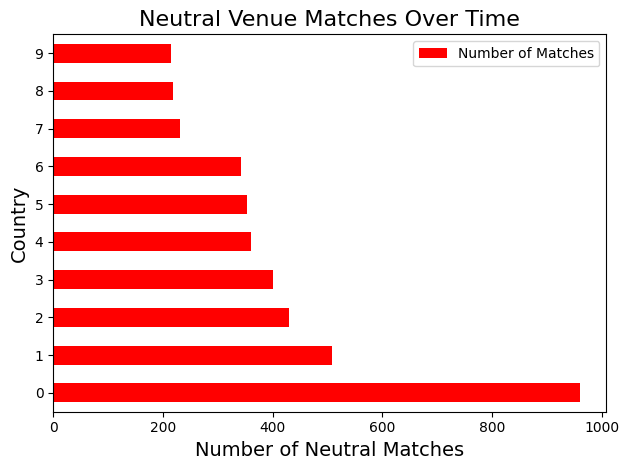

In [ ]:
# @title
#bar-chart displaying nuetral matches
plt.figure(figsize=(12, 6))
neutral_matches.plot(kind='barh', color='red')
plt.title('Neutral Venue Matches Over Time', fontsize=16)
plt.xlabel('Number of Neutral Matches', fontsize=14)
plt.ylabel('Country', fontsize=14)
plt.tight_layout()
plt.show()

TEAMS WITH THE MOST MATCHES PLAYED

In [ ]:
# @title
#total matches played by team
total_matches = results_df['country'].value_counts()
total_matches = total_matches.reset_index()
total_matches.columns = ['Team', 'Matches Played']
#top 10 teams that played the most matches
total_matches = total_matches.head(10)


total_matches


,Team,Matches Played
0,United States,1407
1,France,892
2,Malaysia,818
3,England,748
4,Qatar,707
5,Thailand,705
6,Germany,675
7,Sweden,671
8,United Arab Emirates,592
9,Spain,586


THE TEAMS THAT PLAYED EACH OTHER THE MOST

In [ ]:
# @title
# most teams that played each other the most
results_df['match_pair'] = results_df.apply(
    lambda row: tuple(sorted([row['home_team'], row['away_team']])), axis=1
)

match_frequency = results_df['match_pair'].value_counts()
match_frequency = match_frequency.reset_index()
match_frequency.columns = ['Teams Playing', 'Frequency']

 #the top 10 most frequent matches
most_frequent_matches = match_frequency.head(10)
most_frequent_matches


,Teams Playing,Frequency
0,"(Argentina, Uruguay)",182
1,"(Austria, Hungary)",137
2,"(Belgium, Netherlands)",128
3,"(Guernsey, Jersey)",119
4,"(England, Scotland)",118
5,"(Kenya, Uganda)",110
6,"(Argentina, Brazil)",109
7,"(Norway, Sweden)",109
8,"(Denmark, Sweden)",108
9,"(Argentina, Paraguay)",107


TEAMS WITH THE MOST FRIENDLIES

In [ ]:
# @title
#top 10 teams that played the most friendlies
friendly_matches = results_df[results_df['tournament'] == 'Friendly']['country'].value_counts()
friendly_matches = friendly_matches.head(10)
friendly_matches.reset_index(name='Friendly Matches')

,country,Friendly Matches
0,United States,710
1,France,501
2,Spain,371
3,Austria,358
4,Germany,344
5,Switzerland,308
6,England,307
7,United Arab Emirates,299
8,Hungary,289
9,Sweden,262


SUBSEQUENT ANALYSIS WAS DONE USING THE GOALSCORER SHEET.

HIGHEST GOALSCORERS OF ALL TIME

In [ ]:
# @title
#  Top 10 goalscorers of all time
top_scorers = goalscorers_df['scorer'].value_counts().head(10)
top_scorers = top_scorers.reset_index()

top_scorers.columns = ['Goal Scorer', 'Goals Scored']
top_scorers

,Goal Scorer,Goals Scored
0,Cristiano Ronaldo,108
1,Robert Lewandowski,63
2,Romelu Lukaku,60
3,Harry Kane,58
4,Lionel Messi,55
5,Edin Džeko,50
6,Ali Daei,49
7,Miroslav Klose,48
8,Aleksandar Mitrović,47
9,Luis Suárez,47


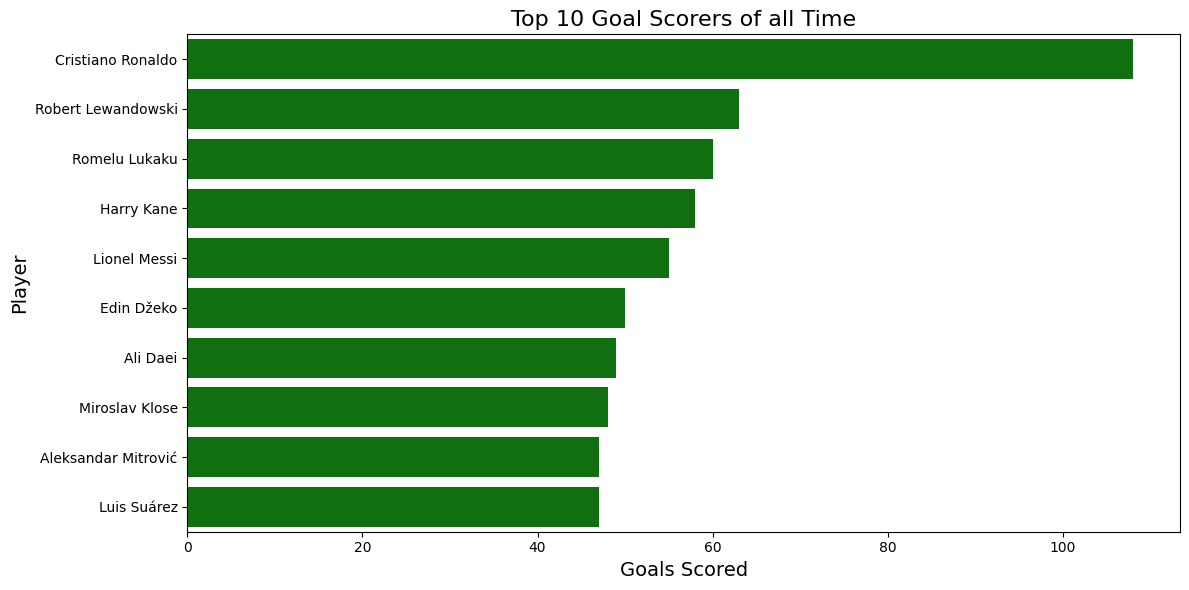

In [ ]:
# @title
plt.figure(figsize=(12, 6))
sns.barplot(x='Goals Scored', y='Goal Scorer', data=top_scorers, color='green')
plt.title('Top 10 Goal Scorers of all Time', fontsize=16)
plt.xlabel('Goals Scored', fontsize=14)
plt.ylabel('Player', fontsize=14)
plt.tight_layout()
plt.show()

In [ ]:
# @title
# Top 10 penalty scorers
penalty_scorers = goalscorers_df[goalscorers_df['penalty'] == True]['scorer'].value_counts()
penalty_scorers = penalty_scorers.reset_index()
penalty_scorers.columns = ['Player', 'Penalty Scored']
penalty_scorers = penalty_scorers.head(10)
penalty_scorers

,Player,Penalty Scored
0,Harry Kane,20
1,Cristiano Ronaldo,19
2,Lionel Messi,14
3,Hristo Stoichkov,13
4,Robert Lewandowski,13
5,Mile Jedinak,11
6,Cuauhtémoc Blanco,11
7,Landon Donovan,10
8,Robbie Keane,10
9,Fernando Hierro,10


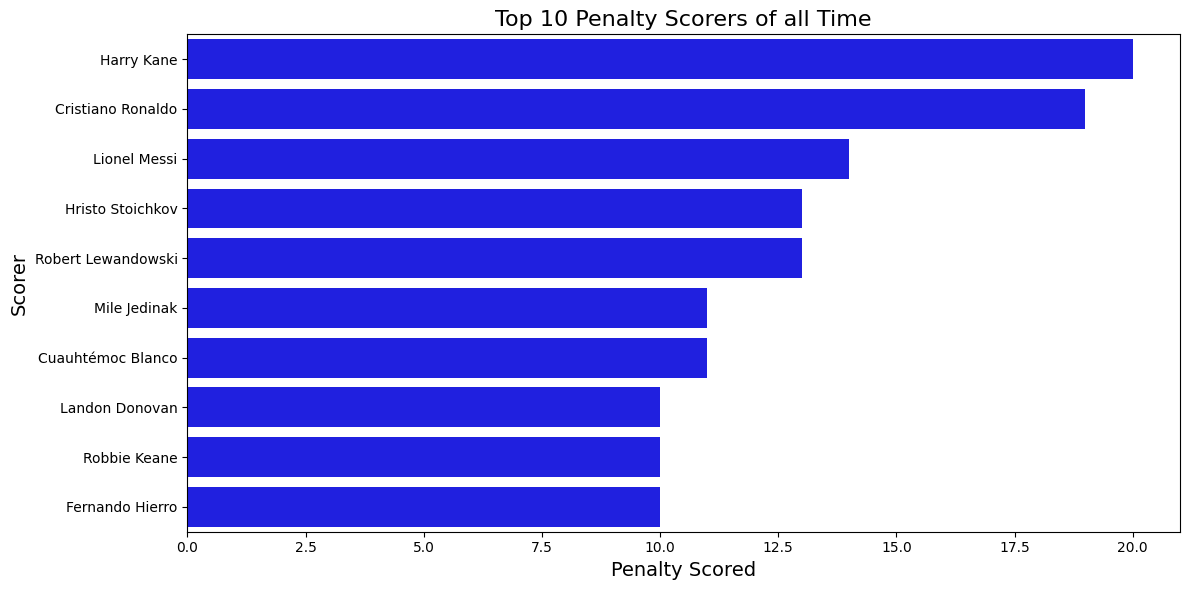

In [ ]:
# @title
#creating a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=penalty_scorers['Penalty Scored'], y=penalty_scorers['Player'], color='blue')
plt.title('Top 10 Penalty Scorers of all Time', fontsize=16)
plt.xlabel('Penalty Scored', fontsize=14)
plt.ylabel('Scorer', fontsize=14)
plt.tight_layout()
plt.show()

SUSEQUENT ANALYSIS WAS DONE USING THE SHOOTOUT SHEET.

TEAMS WITH THE MOST PENALTY SHOOT-OUT VICTORIES

In [ ]:
# @title
# Top 10 teams with most penalty shootout wins
shootout_wins = shootouts_df['winner'].value_counts().head(10)
shootout_wins = shootout_wins.reset_index()
shootout_wins.columns = ['Team', 'Shootout Wins']
shootout_wins

,Team,Shootout Wins
0,Argentina,15
1,South Korea,15
2,Egypt,14
3,Zambia,14
4,Thailand,13
5,South Africa,13
6,Iraq,11
7,Senegal,11
8,Indonesia,10
9,Ivory Coast,10


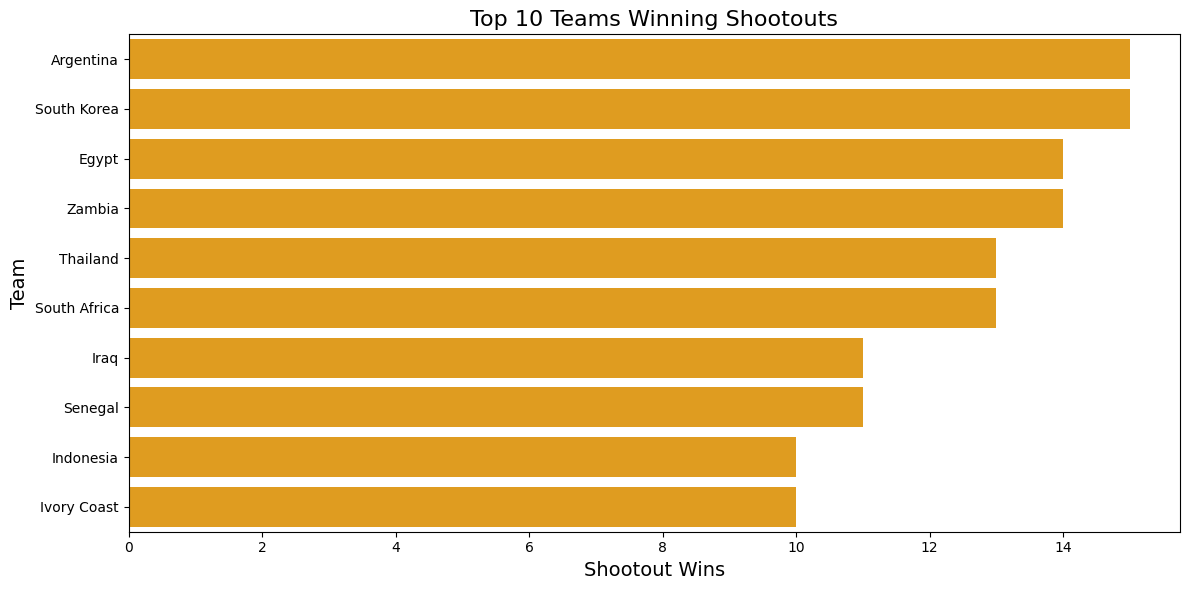

In [ ]:
# @title
plt.figure(figsize=(12, 6))
# Use the 'Team' column for the y-axis and 'Shootout Wins' for the x-axis
sns.barplot(x='Shootout Wins', y='Team', data=shootout_wins, color='orange')
plt.title('Top 10 Teams Winning Shootouts', fontsize=16)
plt.xlabel('Shootout Wins', fontsize=14)
plt.ylabel('Team', fontsize=14)
plt.tight_layout()
plt.show()

**INSIGHTFUL CONCLUSION**



* From our results, the best 3 teams of all time, Brazil, England and Argentina.
* For teams that dominated different eras, Scotland dominated 2 decades from 1870s to 1880s, while England dominated the 1890s to 1900s, followed by Argentina in the 1910s from our results.
* The most frequent tournament happens to be friendly matches played followed by the FIFA world cup qualifications.
* The top goal scorer was Cristiano Ronaldo with 108 goals, followed by Robert Lewandowski with 63 goals,and Romelu Lukaku with 60 goals.
* Matches played by decade indicated a constant growth up until the 1940s where there was a decline probably due to the world war 2, after which it peaked again until 2020 where there was a decline which might have resulted to the Covid 19 pandemic and also because the 2020 decade is not over yet and there is still a lot of a football to be played.
* Top penalty shootout scorers, Harry kane topped the list with 20, followed by Ronaldo with 19 and Lionel Messi with 14.
* Top 3 penalty shootout  wins by country, Argentina, South Korea, Egypt.












